# Module 2 Regression Homework

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation

In [3]:
# downloading the dataset car_fuel_efficiency.csv
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 05:09:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-08 05:09:50 (104 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [4]:
# loading the dataset
data=pd.read_csv('car_fuel_efficiency.csv')

data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
# extracting the features and target variable
features= ['engine_displacement','horsepower','vehicle_weight','model_year']
target= 'fuel_efficiency_mpg'
x=data[features]
y=data[target]

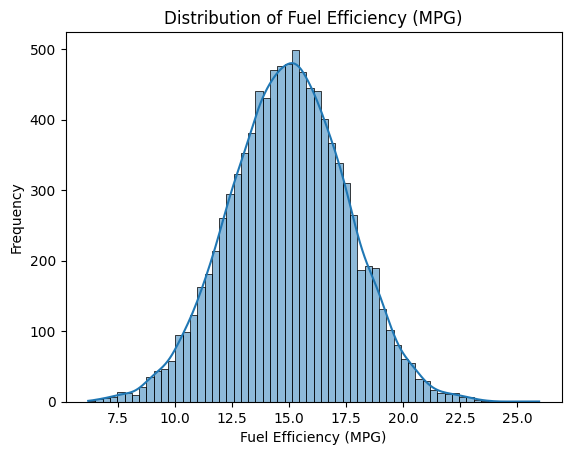

In [6]:
# EDA for fuel_efficiency_mpg
sns.histplot(data[target], kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

`fuel_efficiency_mpg` does not have a `Long tail`, it has a bell shaped curve 

## Question 1

In [9]:
# question 1 Answer
x[features].isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

the column with missing values is `horsepower`

## Question 2

In [11]:
# Question 2 Answer
median_horsepower = x['horsepower'].median()
print(f"The median horsepower is: {median_horsepower}")

The median horsepower is: 149.0


## Splitting the Data

In [ ]:
# shuffling the data and splitting into train and val and test sets
n = len(x)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [15]:
n,n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [16]:
# creating an index array and shuffling it
idx = np.arange(n)
# creating a random seed to make the shuffling reproducible
np.random.seed(42)
np.random.shuffle(idx)
# splitting the data into train, val and test sets
df_train = x.iloc[idx[:n_train]]
df_val = x.iloc[idx[n_train:n_train+n_val]]
df_test = x.iloc[idx[n_train+n_val:]]

df_train.head()


,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


## Question 3

In [18]:
# Lineaar Regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)



In [20]:



# Option 1: Fill missing values with 0
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()
df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

# Train the model
w0_0,w_0 = train_linear_regression(df_train_0[features], y.iloc[df_train_0.index])

# Predict and calculate RMSE
y_pred_0 = w0_0 + df_val_0[features].dot(w_0)
rmse_0 = rmse(y.iloc[df_val_0.index], y_pred_0)
rmse_0 = round(rmse_0, 2)

# Option 2: Fill missing values with the mean (from training set)
mean_horsepower_train = df_train['horsepower'].mean()
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_horsepower_train)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_horsepower_train)

# Train the model
w0_mean,w_mean = train_linear_regression(df_train_mean[features], y.iloc[df_train_mean.index])

# Predict and calculate RMSE
y_pred_mean = w0_mean + df_val_mean[features].dot(w_mean)
rmse_mean = rmse(y.iloc[df_val_mean.index], y_pred_mean)
rmse_mean = round(rmse_mean, 2)

# Compare RMSE
print(f"RMSE (fill with 0): {rmse_0}")
print(f"RMSE (fill with mean): {rmse_mean}")

better_option = "fill with mean" if rmse_mean < rmse_0 else "fill with 0"
print(f"The better option is: {better_option}")

RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.46
The better option is: fill with mean


## Question 4

In [21]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
# Question 4 Answer
# Prepare the data (fill NAs with 0)
df_train_ridge = df_train.copy()
df_val_ridge = df_val.copy()
df_train_ridge['horsepower'] = df_train_ridge['horsepower'].fillna(0)
df_val_ridge['horsepower'] = df_val_ridge['horsepower'].fillna(0)

# List of regularization parameters
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

# Train and evaluate the model for each r
for r in r_values:
    w0_0,w_0 = train_linear_regression_reg(df_train_ridge[features], y.iloc[df_train_ridge.index], r)
    y_pred_reg = w0_0 + df_val_ridge[features].dot(w_0)
    rmse_ridge = rmse(y.iloc[df_val_ridge.index], y_pred_reg)
    rmse_scores.append(round(rmse_ridge, 2))

# Find the best r
best_r_index = np.argmin(rmse_scores)
best_r = r_values[best_r_index]
best_rmse = rmse_scores[best_r_index]

print(f"RMSE scores: {rmse_scores}")
print(f"The best r is: {best_r} with RMSE: {best_rmse}")

RMSE scores: [np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52)]
The best r is: 0 with RMSE: 0.52


## Question 5

In [ ]:
# Question 5 Answer
# List of seeds to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Shuffle and split the data
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train_q5 = x.iloc[idx[:n_train]]
    df_val_q5 = x.iloc[idx[n_train:n_train+n_val]]
    df_test_q5 = x.iloc[idx[n_train+n_val:]]
    
    # Fill missing values with 0
    df_train_0 = df_train_q5.copy()
    df_val_0 = df_val_q5.copy()
    df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
    df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)
    
    # Train the model
    w0, w = train_linear_regression(df_train_0[features], y.iloc[df_train_0.index])
    
    # Predict and calculate RMSE
    y_pred = w0 + df_val_0[features].dot(w)
    rmse_score = rmse(y.iloc[df_val_0.index], y_pred)
    rmse_scores.append(rmse_score)

# Calculate the standard deviation of RMSE scores
std = np.std(rmse_scores)
std_rounded = round(std, 3)

print(f"Standard deviation of RMSE scores: {std_rounded}")

Standard deviation of RMSE scores: 0.007


## Question 6

In [26]:
# "Question 6 Answer
# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val])

# Fill missing values with 0
df_train_val_0 = df_train_val.copy()
df_train_val_0['horsepower'] = df_train_val_0['horsepower'].fillna(0)

# Train the model with r=0.001
r = 0.001
w0_train_val, w_train_val = train_linear_regression_reg(df_train_val_0[features], y.iloc[df_train_val_0.index], r)

# Fill missing values in the test dataset with 0
df_test_0 = df_test.copy()
df_test_0['horsepower'] = df_test_0['horsepower'].fillna(0)

# Predict on the test dataset
y_pred_test = w0_train_val + df_test_0[features].dot(w_train_val)

# Calculate RMSE on the test dataset
rmse_test = rmse(y.iloc[df_test_0.index], y_pred_test)


print(f"RMSE on the test dataset: {rmse_test}")

RMSE on the test dataset: 0.5165862256800011
